In [1]:
#!pip install seaborn
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
#!pip install tensorflow
import tensorflow as tf

# READING THE DATASET

In [2]:
dataset = pd.read_csv('framingham.csv')
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [3]:
dataset.shape

(4240, 16)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


# CHECKING FOR NULL VALUES

In [5]:
dataset.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

# CORRELATION GRAPH

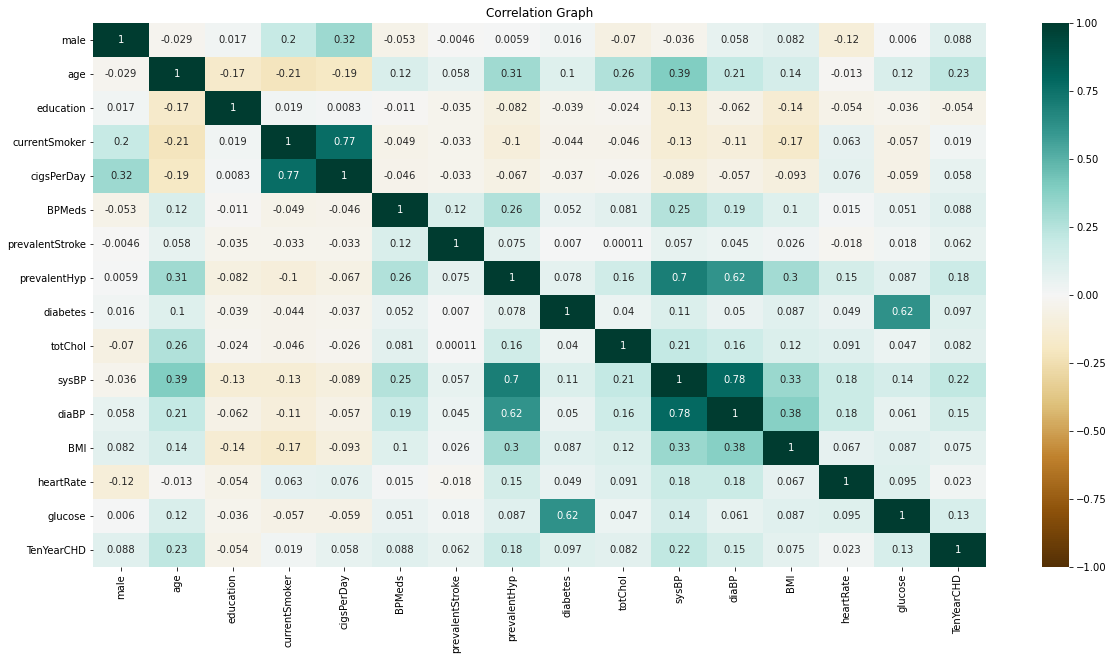

In [6]:
plt.figure(figsize=(20, 10))
heatmap = sns.heatmap(dataset.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Graph');

array([[<AxesSubplot:title={'center':'male'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'education'}>,
        <AxesSubplot:title={'center':'currentSmoker'}>],
       [<AxesSubplot:title={'center':'cigsPerDay'}>,
        <AxesSubplot:title={'center':'BPMeds'}>,
        <AxesSubplot:title={'center':'prevalentStroke'}>,
        <AxesSubplot:title={'center':'prevalentHyp'}>],
       [<AxesSubplot:title={'center':'diabetes'}>,
        <AxesSubplot:title={'center':'totChol'}>,
        <AxesSubplot:title={'center':'sysBP'}>,
        <AxesSubplot:title={'center':'diaBP'}>],
       [<AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'heartRate'}>,
        <AxesSubplot:title={'center':'glucose'}>,
        <AxesSubplot:title={'center':'TenYearCHD'}>]], dtype=object)

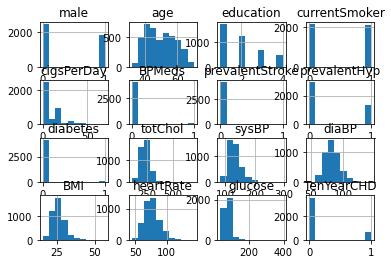

In [7]:
dataset.hist()

# SCALING THE COLUMS

In [8]:
columns_to_scale = ['age', 'education', 'currentSmoker', 'BPMeds', 'sysBP','diaBP','diabetes','totChol','BMI']
Scaler = StandardScaler()
dataset[columns_to_scale] = Scaler.fit_transform(dataset[columns_to_scale])

# DEFINING THE DATASET FOR TRAINING

In [9]:
X = dataset.drop('TenYearCHD', axis=1)
y = dataset['TenYearCHD']
X = dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]
print(X.shape)
print(y.shape)

(4240, 15)
(4240,)


# IMPUTING TO DEAL WITH NULL VALUES

In [10]:
from sklearn.impute import SimpleImputer
_ = SimpleImputer(missing_values = np.nan, strategy = 'mean')
_.fit(X)
X = _.transform(X)

# DEFINING AND SPLITTING THE TRAINING AND TESTING DATA

In [11]:
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.20, random_state=0)

# THE SHAPE OF THE TRAINING AND TESTING DATA

In [12]:
print("shape x_train:", Xtr.shape)
print("shape y_train:", ytr.shape)
print("shape x_test:", Xte.shape)
print("shape y_test:", yte.shape)

shape x_train: (3392, 15)
shape y_train: (3392,)
shape x_test: (848, 15)
shape y_test: (848,)


# SCALER FUNCTION

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xtr = scaler.fit_transform(Xtr)
Xte = scaler.fit_transform(Xte)

# TRAINING THE MODEL AND GETTING THE REPORTS FOR IT
This is the custom function that first trains the model and then gets report for it

In [14]:
def report(clf):
    clf.fit(Xtr,ytr)
    y_pred = clf.predict(Xte)
    score = cross_val_score(clf,Xtr,ytr,cv=5).mean()
    print("Accuracy of the model",clf,"=",accuracy_score(yte,y_pred))
    print("Cross val score:",score)
    print("Confusion Matrix:")
    print(confusion_matrix(yte,y_pred))
    print("Classification report: \n",classification_report(yte, y_pred))
    matrix = plot_confusion_matrix(clf, Xte, yte)
    matrix.ax_.set_title('Confusion Matrix')
    plt.show()

# LOGISTIC REGRESSION

Accuracy of the model LogisticRegression(C=1, solver='saga') = 0.8608490566037735
Cross val score: 0.8525960005387064
Confusion Matrix:
[[720   2]
 [116  10]]
Classification report: 
               precision    recall  f1-score   support

           0       0.86      1.00      0.92       722
           1       0.83      0.08      0.14       126

    accuracy                           0.86       848
   macro avg       0.85      0.54      0.53       848
weighted avg       0.86      0.86      0.81       848



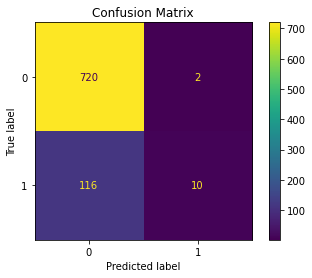

In [15]:
clf = LogisticRegression(solver='saga',max_iter=100,tol=0.0001,C=1)
report(clf)

# DECISION TREE CLASSIFIER

Accuracy of the model DecisionTreeClassifier(max_features='auto', min_samples_leaf=2) = 0.785377358490566
Cross val score: 0.7980558777657583
Confusion Matrix:
[[643  79]
 [103  23]]
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.89      0.88       722
           1       0.23      0.18      0.20       126

    accuracy                           0.79       848
   macro avg       0.54      0.54      0.54       848
weighted avg       0.77      0.79      0.78       848



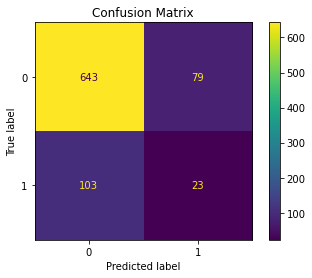

In [16]:
clf = DecisionTreeClassifier(max_features='auto',min_samples_leaf=2)
report(clf)

# RANDOM FOREST CLASSIFIER 

Accuracy of the model RandomForestClassifier(class_weight='balanced', max_features='log2') = 0.8549528301886793
Cross val score: 0.8458139464160812
Confusion Matrix:
[[722   0]
 [123   3]]
Classification report: 
               precision    recall  f1-score   support

           0       0.85      1.00      0.92       722
           1       1.00      0.02      0.05       126

    accuracy                           0.85       848
   macro avg       0.93      0.51      0.48       848
weighted avg       0.88      0.85      0.79       848



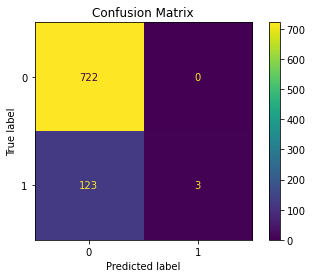

In [17]:
clf = RandomForestClassifier(criterion='gini',class_weight='balanced',max_features='log2')
report(clf)

# KNEIGHBORS CLASSIFIER 

Accuracy of the model KNeighborsClassifier(n_neighbors=6) = 0.8525943396226415
Cross val score: 0.841389602095742
Confusion Matrix:
[[714   8]
 [117   9]]
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       722
           1       0.53      0.07      0.13       126

    accuracy                           0.85       848
   macro avg       0.69      0.53      0.52       848
weighted avg       0.81      0.85      0.80       848



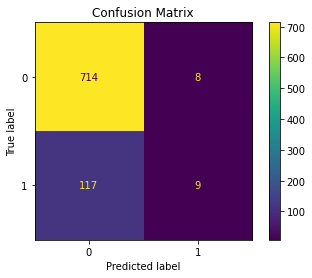

In [18]:
clf = KNeighborsClassifier(algorithm = 'auto',n_neighbors=6)
report(clf)

# GAUSSIAN NAIVE BAYES

Accuracy of the model GaussianNB() = 0.8266509433962265
Cross val score: 0.8248834612761261
Confusion Matrix:
[[676  46]
 [101  25]]
Classification report: 
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       722
           1       0.35      0.20      0.25       126

    accuracy                           0.83       848
   macro avg       0.61      0.57      0.58       848
weighted avg       0.79      0.83      0.81       848



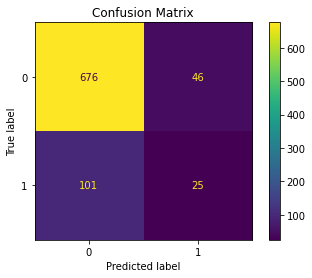

In [19]:
clf = GaussianNB()
report(clf)

# SUPPORT VECTOR MACHINE

Accuracy of the model SVC(gamma='auto', kernel='poly') = 0.8537735849056604
Cross val score: 0.8481720906590902
Confusion Matrix:
[[714   8]
 [116  10]]
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.99      0.92       722
           1       0.56      0.08      0.14       126

    accuracy                           0.85       848
   macro avg       0.71      0.53      0.53       848
weighted avg       0.81      0.85      0.80       848



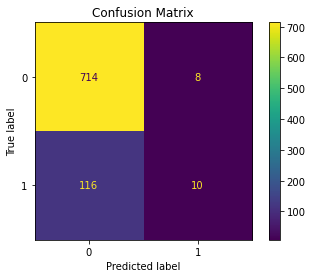

In [20]:
clf = SVC(gamma='auto',kernel='poly')
report(clf)

# Artificial Neural Networks(ANN) using tensorflow

In [30]:
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units = 4, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 4, activation='relu'))
ann.add(tf.keras.layers.Dense(units = 1,activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model = ann.fit(Xtr,ytr,validation_data=(Xte,yte), batch_size = 16,epochs=100)

Epoch 1/100
212/212 [==============================] - 0s 602us/step - loss: 0.6872 - accuracy: 0.6580 - val_loss: 0.5843 - val_accuracy: 0.8491
Epoch 2/100
212/212 [==============================] - 0s 383us/step - loss: 0.5557 - accuracy: 0.8464 - val_loss: 0.4488 - val_accuracy: 0.8514
Epoch 3/100
212/212 [==============================] - 0s 379us/step - loss: 0.4391 - accuracy: 0.8445 - val_loss: 0.4060 - val_accuracy: 0.8514
Epoch 4/100
212/212 [==============================] - 0s 385us/step - loss: 0.3945 - accuracy: 0.8520 - val_loss: 0.3989 - val_accuracy: 0.8514
Epoch 5/100
212/212 [==============================] - 0s 383us/step - loss: 0.4106 - accuracy: 0.8413 - val_loss: 0.3959 - val_accuracy: 0.8514
Epoch 6/100
212/212 [==============================] - 0s 380us/step - loss: 0.3875 - accuracy: 0.8497 - val_loss: 0.3938 - val_accuracy: 0.8502
Epoch 7/100
212/212 [==============================] - 0s 372us/step - loss: 0.3833 - accuracy: 0.8546 - val_loss: 0.3925 - val_ac

In [31]:
y_pred = ann.predict(Xte)
y_pred = (y_pred > 0.5)
c_m = confusion_matrix(yte, y_pred)
print(c_m)
print(accuracy_score(yte, y_pred))
print(classification_report(yte, y_pred))

[[719   3]
 [123   3]]
0.8514150943396226
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       722
           1       0.50      0.02      0.05       126

    accuracy                           0.85       848
   macro avg       0.68      0.51      0.48       848
weighted avg       0.80      0.85      0.79       848



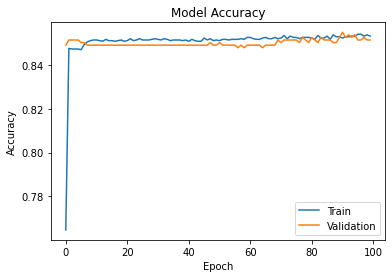

In [32]:
plt.plot(model.history['accuracy'])
plt.plot(model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()